<a href="https://colab.research.google.com/github/Rabia-creator/RabiaSaqib_DL_assignments_Q2_batch35/blob/main/credit_card_fraud_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import tensorboard
from pylab import rcParams

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [ ]:
df=pd.read_csv("creditcard.csv")

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#configuring module
%matplotlib inline
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize'] = 14,8
Random_Seed=42

In [ ]:
# renaming columns
df.rename(columns={"Class": "Fraud"},inplace=True)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
#checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0
dtype: int64

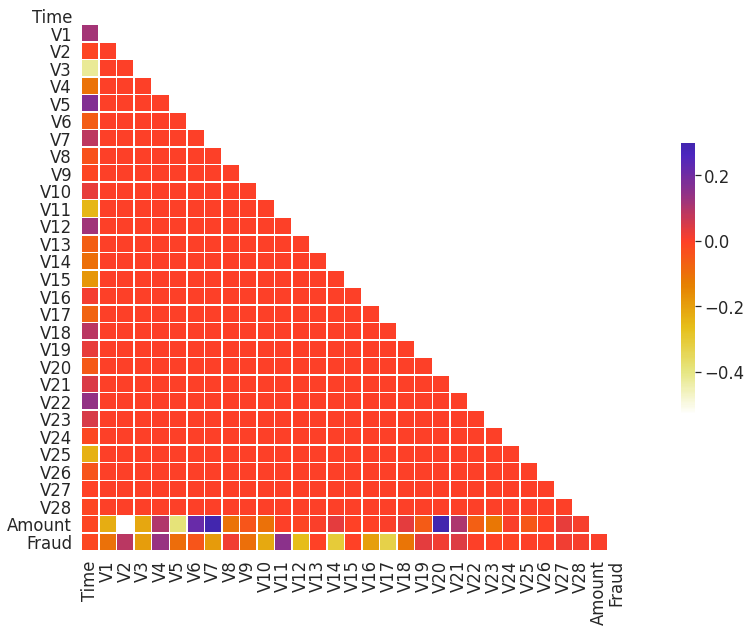

In [ ]:
#checking correlations
corr= df.corr()

#generates a mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#figure size
f,ax= plt.subplots(figsize=(20, 10))

#generate a custom diverging colormap
cmap= sns.diverging_palette(220,10, as_cmap=True)

#draw the heatmap with the mask  and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap='CMRmap_r',vmax=.3, center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

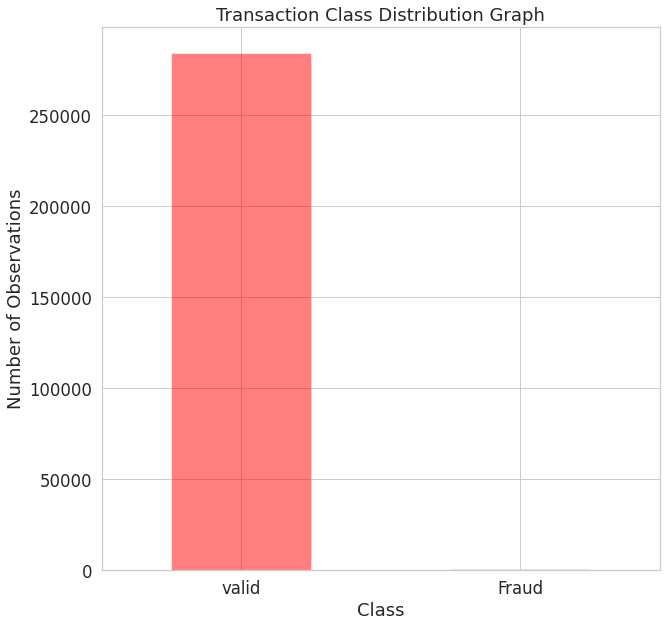

In [ ]:
# Transaction class Distribution plot

labels=['valid','Fraud']
plt.figure(figsize =(10,10))
count_classes = pd.value_counts(df['Fraud'], sort = True)
count_classes.plot(kind='bar', rot=0, color ='red', alpha=0.5)
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution Graph")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.show()

In [ ]:
len(df)


284807

In [ ]:
len_fraud = len(df[df.Fraud == 1])
len_fraud

492

In [ ]:
len_valid = 284807-492
len_valid

284315

In [ ]:
perc_fraud=(len_fraud*100)/ len(df)
perc_fraud

0.1727485630620034

In [ ]:
# making datafarames of valid and fraud transactions to check important stats
Fraud_df = df[df.Fraud == 1]
Valid_df = df[df.Fraud == 0]

In [ ]:
# checking important stats of Amouont used  in Fraud Transactions
Fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

AttributeError: ignored

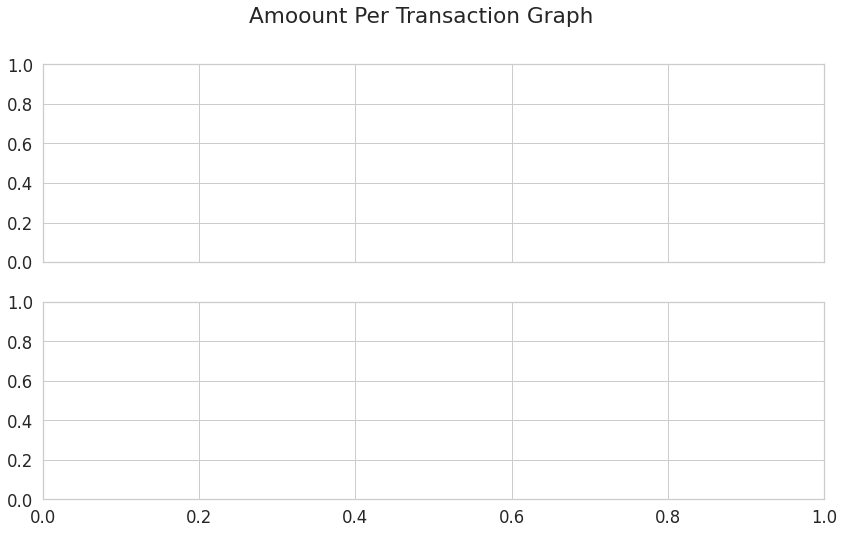

In [ ]:
# Amount per transaction by class
f,(ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Amoount Per Transaction Graph')
bins=50
ax1.hist(Fraud_df.Amoount, bins=bins, color='blue')
ax1.set_title('Fraud Transactions')

ax2.hist(Valid_df.Amouont,bins=bins, color='red',alpha = 0.5)
ax2.set_title('Valid Transactions')

plt.xlabel('Amount($)')
plt.ylabel('Number of Transaction')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

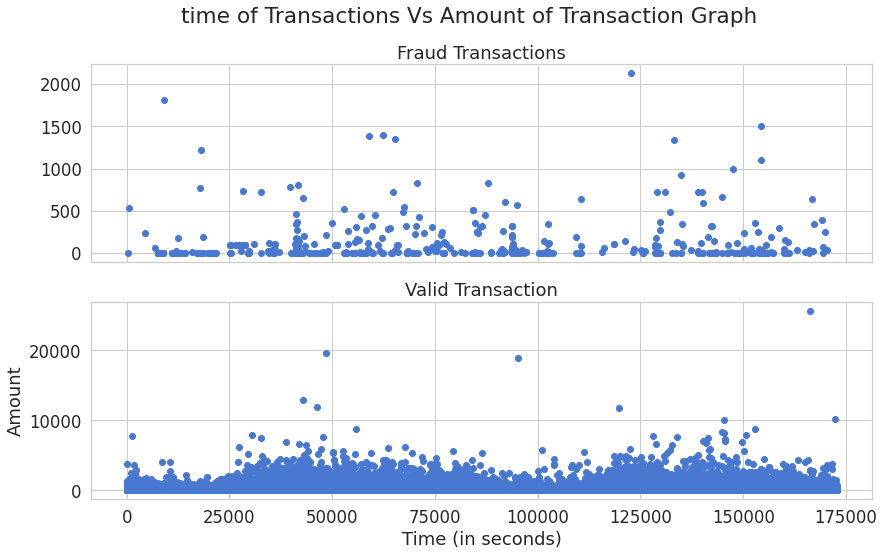

In [ ]:
#3 time of Transaction Vs amount by class
f,(ax1,ax2)= plt.subplots(2,1,sharex = True)
f.suptitle('time of Transactions Vs Amount of Transaction Graph')

ax1.scatter(Fraud_df.Time, Fraud_df.Amount)
ax1.set_title('Fraud Transactions')

ax2.scatter(Valid_df.Time,Valid_df.Amount)
ax2.set_title('Valid Transaction')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
# normalize data
#we need to normalize 2 features (amount and time) 
from sklearn.preprocessing import StandardScaler
df_norm=df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1,1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1,1))

In [ ]:
# split dataset into training and testing
#Train Data

train_data=df_norm.iloc[:199365,:]
train_data.shape

(199365, 31)

In [ ]:
#test Data
test_data=df_norm.iloc[199365:,:]
test_data.shape

(85442, 31)

In [ ]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
199365,0.802626,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,0.746967,-1.256213,-0.762171,0.086847,-0.133543,0.365813,1.400839,-0.115840,-1.594770,1.026636,0.060715,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,-0.129536,0
199366,0.802626,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,1.493825,0.583293,0.884700,0.831223,-0.293394,-0.870717,1.653737,-1.335181,0.431294,-1.605950,-0.198616,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,-0.350071,0
199367,0.802626,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,-0.072189,1.020453,0.808519,0.179530,0.403686,-1.355320,-0.890292,-0.823874,-0.161798,-0.240885,-0.209666,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,-0.229689,0
199368,0.802647,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,-0.613531,0.826612,-0.315592,-1.848798,-0.465431,-0.757847,0.571839,0.262660,0.450587,0.023705,-0.090654,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,-0.346113,0
199369,0.802647,2.005556,-0.146704,-1.019430,0.330239,-0.180449,-0.953319,0.053860,-0.165823,0.352282,0.255342,0.953976,0.886864,-0.546470,0.579937,-0.610841,0.088436,-0.475671,-0.341351,0.402815,-0.241755,-0.235137,-0.613122,0.342269,0.063677,-0.359509,0.174021,-0.078440,-0.069642,-0.331760,0


In [ ]:
# shuffle train data
train_data=train_data.sample(frac=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
125119,-0.363688,1.113900,-0.841732,0.410580,-0.346200,-1.237671,-1.073811,-0.202773,-0.333140,-0.824549,0.449804,0.025720,0.272136,1.143390,-0.479683,-0.208597,0.602126,0.604301,-1.904362,0.642481,0.395750,0.128148,0.132337,-0.123757,0.769505,0.481930,-0.292134,-0.012302,0.042963,0.244245,0
27496,-1.268547,-3.490234,-2.622130,0.001530,-3.157080,2.955945,-1.222573,-2.445628,-1.541756,1.167526,-0.341908,0.427803,1.580612,0.735171,-0.057660,1.461669,-4.006304,1.492889,-1.053474,-1.357968,-2.701052,0.822467,-0.033561,-1.284627,-0.760734,-0.643829,-0.740157,1.346597,-0.096545,-0.190907,0
50872,-1.055568,-0.591610,1.231492,0.696697,0.850363,-0.254853,-0.165347,0.127458,0.503413,-0.712996,0.001015,1.330690,0.464094,-0.886663,0.958065,0.623300,-0.288426,0.095606,0.185837,0.208605,-0.263056,0.288546,0.614937,-0.006784,0.210965,-0.319391,-0.351231,-0.304241,-0.038376,-0.309650,0
162411,0.426994,-1.250743,0.932108,-0.423712,-0.626003,0.624919,-1.226834,1.040021,-0.590977,1.163747,1.290995,-0.749802,0.205095,0.049675,-0.521796,-0.520944,-0.445832,-0.466242,-1.011905,-0.185984,0.047446,-0.365421,-0.343608,0.086449,0.000368,-0.602804,0.104980,-0.120137,0.296702,-0.251678,0
91833,-0.656309,-0.213737,0.726661,1.572802,-0.051265,-0.352745,-0.791121,0.457399,-0.020552,-0.392846,-0.382866,0.236690,-0.356803,-0.971978,0.499037,1.654705,-0.682749,0.625687,-0.871048,0.732783,-0.011940,-0.062212,-0.165147,0.104641,0.644719,-0.876068,0.908815,0.079425,0.136631,-0.353229,0


In [ ]:
# shuffle test data
test_data=test_data.sample(frac=1)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
212048,0.923961,-1.018115,0.550397,0.463313,-0.930042,0.259659,0.169063,1.527060,-0.030712,-0.498278,-1.437552,1.224336,0.504781,0.159699,-1.314588,-0.802481,0.934964,0.100966,0.595300,-0.673925,-0.054616,-0.095352,-0.287513,-0.043752,0.625382,0.766831,0.390870,-0.163008,-0.103743,0.440791,0
270168,1.455800,2.172254,-0.834415,-1.288316,-0.719871,-0.270293,0.136616,-0.737154,0.077575,-0.382169,1.057288,-0.057116,-0.030115,-0.593266,0.334036,-0.386500,-1.082785,-0.494918,1.619250,-0.306304,-0.630251,-0.395769,-0.607739,0.256379,0.003064,-0.284283,0.552534,-0.053488,-0.069044,-0.349231,0
245879,1.224205,2.035439,-1.213960,-0.253547,-0.806533,-0.856509,1.016334,-1.544473,0.285548,0.016242,0.927397,-0.127983,0.920786,1.975913,-0.650708,0.365900,-0.086408,-1.303134,2.469943,-0.640781,-0.323356,-0.121401,0.152250,0.176914,-0.313840,-0.543988,0.618010,0.014674,-0.033140,-0.139212,0
274638,1.501875,2.073526,0.165139,-1.925285,0.454646,0.345364,-1.241414,0.214025,-0.308212,0.712550,-0.503078,-0.742222,-0.418737,-0.598656,-0.720189,1.057483,0.326234,0.423247,0.668985,-0.363128,-0.236428,0.162283,0.620796,-0.058517,-0.509472,0.269719,-0.071079,-0.002969,-0.034725,-0.334998,0
280506,1.574146,0.085865,0.766384,-0.013531,-0.735218,0.671322,-0.765876,0.913707,-0.104495,0.156893,-0.377493,-1.716155,-0.622975,-0.872874,0.271102,-0.242218,0.154669,-0.602030,-0.400145,0.183899,-0.081253,-0.317515,-0.781546,-0.005516,-0.688963,-0.431191,0.184573,0.239875,0.088385,-0.348072,0


In [ ]:
#dropping labels from training and testing data
train_labels=train_data.pop('Fraud')
# train_labels= train_labels.values

test_labels= test_data.pop('Fraud')
#test_labels=test_labels.values

In [ ]:
train_labels

125119    0
27496     0
50872     0
162411    0
91833     0
         ..
8809      0
11988     0
193195    0
87237     0
62223     0
Name: Fraud, Length: 199365, dtype: int64

In [ ]:
test_labels

212048    0
270168    0
245879    0
274638    0
280506    0
         ..
217186    0
262842    0
229564    0
281756    0
211391    0
Name: Fraud, Length: 85442, dtype: int64

In [ ]:
# building Base Model
model=Sequential()
model.add(Dense(10, activation = 'relu', input_shape = [len(train_data.keys())]))
model.add(Dense(8, activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam', loss= 'binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [ ]:

import tensorboard

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer=ModelCheckpoint(filepath= "CreditCardFraudDetectionModel.h5" , verbose=0, save_best_only = True)
tensorboard=TensorBoard(log_dir ='./logs',histogram_freq = 0, write_graph = True, write_images = True)

In [ ]:
#fitting base model on 100 epochs

history = model.fit(train_data,train_labels,epochs=100, batch_size=32, shuffle=True,validation_split=0.2, verbose= 1,callbacks=[checkpointer,tensorboard]).history

Epoch 1/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0478 - accuracy: 0.9905 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 2/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 3/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 5/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 6/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 7/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0045 - val_ac

In [ ]:
# storing history in a data frame
history_df= pd.DataFrame(history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.001259,0.999549,0.016745,0.999147
96,0.001280,0.999542,0.017390,0.999147
97,0.001269,0.999599,0.014990,0.999197
98,0.001289,0.999561,0.016257,0.999298
99,0.001087,0.999605,0.017146,0.999298


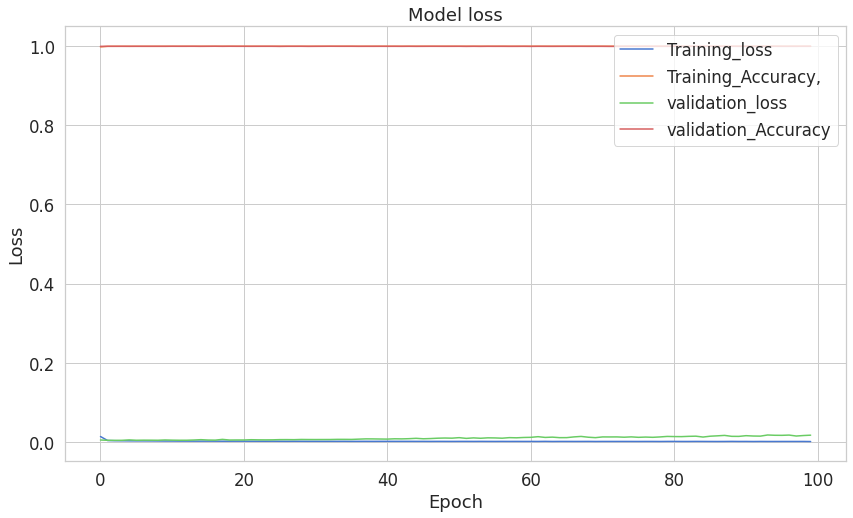

In [ ]:
#plotting loss and accuracy
plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_loss'])
plt.plot(history_df['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training_loss','Training_Accuracy,','validation_loss','validation_Accuracy'],loc = 'upper right');

In [ ]:
# making predictions on TestData
predictions= model.predict(test_data)
predictions= predictions.flatten()

In [ ]:
predictions

array([1.5132305e-13, 2.5639532e-17, 0.0000000e+00, ..., 9.4085763e-14,
       1.2540598e-32, 2.7949965e-10], dtype=float32)

In [ ]:
#testing model on testing data
testing= model.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 999us/step - loss: 0.0113 - accuracy: 0.9995


In [ ]:
print(f"Test Loss: {testing[0]}")
print(f"Test Accuracy: {testing[1]}")

Test Loss: 0.011275500059127808
Test Accuracy: 0.9995084404945374


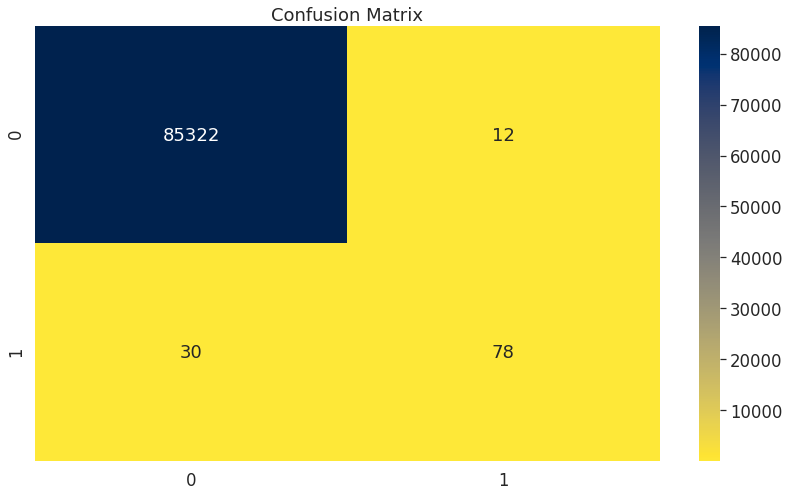

In [ ]:
# plotting Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

#y_pred =model.predict(X_test)

y_test = pd.DataFrame(testing)
cm = confusion_matrix(test_labels,predictions.round())
sns.heatmap(cm, annot=True,fmt='.0f' , cmap='cividis_r')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#building secong model for overcoming unbalanced data problem


In [ ]:
#standardizing the amount Feature

df['NormAmount'] = StandardScaler().fit_transform(df['Time','Amount'].values.reshape(-1,1))
df = df.drop(['Time','Amount'], axis=1)

KeyError: ignored

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Fraud,NormAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
# SEparating test data
X = df.iloc[:,df.columns != 'class']
y=df.iloc[:,df.columns == 'Class']

In [ ]:
#importing SMOTE

from imblearn.over_sampling import SMOTE
np.random.seed(9)

In [ ]:
## counting the number of fraud and valid transactions
all_records = len(df)
number_records_fraud=len(df[df.Fraud == 1])
print(f"No of transactions: {all_records} , Fraud transactions: {number_records_fraud}")

No of transactions: 284807 , Fraud transactions: 492


In [ ]:
#Applying SMOTE
X_resample,y_resample = SMOTE().fit_sample(X,y.values.ravel())

ValueError: ignored

In [ ]:
#transforming in to pandas DataFrame
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

NameError: ignored

In [ ]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)

NameError: ignored

In [ ]:
# making second model
model2=Sequential()
model2.add(Dense(16,kernal_initializer='uniform',activation='relu',input_shape=(29,)))
model2.add(Dense(18,kernal_initializer='unifrom', activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(20, kernal_initializer= 'uniform' ,activation='relu'))
model2.add(Dense(24,kernal_initializer='uniform' , activation='relu'))
model2.add(Dense(1, kernal_initializer='uniform',activation='sigmoid'))
model2.summary()

TypeError: ignored

In [ ]:
#compilation step
model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
#fitting second model on 5 epochs
model2.fit(np.array(X_train),np.array(Y_train),batch_size=15,epoch=5)

NameError: ignored

In [ ]:
#testing second model on test data
score= model2.evaluate(np.array(X_test),np.array(Y_test), batch_size=128)
print('\nTesting Score is: ', score[1]*100, '%')

In [ ]:
#defination function for confusion matrix

import intertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precession_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'
                          cmap=plt.cm.Blues):
  ## this function prints and plots the confusion matrix. Normalization can be applied by setting  'normalize=True

  plt.imshow(cm, interpolation= 'nearest' , cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plot.xticks(tick_marks, classes , rotation=0)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # print('Normalized confusion matrix')
    else:
      #1 print('confusion matrix ,without normalization')

      # print(cm)

      thresh = cm.max() / 2.
      for  i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.textj, i cm[i,j], horizontalalignment = 'center', color='white' if cm[i,j] > thresh else 'black')

        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('predicted Label')

In [ ]:
y_pred = model2.predict(np.array(X_test))

In [ ]:
Y_test = pd.DataFrame(Y_test)
Y_test.shape

In [ ]:
#plotting Confusion Matrix
cnf_matrix = confusion_matrix(Y_test,y_pred.round())
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: " , cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# plot non_normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [ ]:
y_pred = model2.predict(np.array(X))

In [ ]:
# plotting  Confusion Matrix

cnf_matrix= confusion_matrix(y,y_pred.round())
np.set_printoptions(precision=2)

print("recall metric in the testing dataset: ", cnf_matrix[1,1]/cnf_matrix[1,0]+cnf_matrix[1,1]))

#plot non normalized confusion matrix
class_names= [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names ,title ='Confusion matrix')
plt.show()

In [ ]:
#save model
model2.save('CreditCardFraudDetectionModel.h5')